In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


df = pd.read_excel('/Users/martinwolf/Python/Superdepot Reporting/Data/df.xlsx')
df['Pick Datum'] = pd.to_datetime(df['B']).dt.date


In [2]:
def DatenKundeaufbereiten(dfa):
    # DataFrame Picks zu Kunden
    dfapicks = dfa.groupby(['Lieferschein','Pick Datum','Kunde'],dropna =False)['Picks Gesamt'].sum().reset_index()
    dfapicksinCS = dfa.groupby(['Lieferschein','Pick Datum'])['Picks CS'].sum().reset_index()
    dfapicksinPAL = dfa.groupby(['Lieferschein','Pick Datum'])['Picks PAL'].sum().reset_index()
    dfapicksinOUT = dfa.groupby(['Lieferschein','Pick Datum'])['Picks OUT'].sum().reset_index()
    dfakunden = pd.merge(dfapicks, dfapicksinCS[['Lieferschein','Picks CS']],left_on='Lieferschein', right_on='Lieferschein',how='left')
    dfakunden = pd.merge(dfakunden, dfapicksinOUT[['Lieferschein','Picks OUT']],left_on='Lieferschein', right_on='Lieferschein',how='left')
    dfakunden = pd.merge(dfakunden, dfapicksinPAL[['Lieferschein','Picks PAL']],left_on='Lieferschein', right_on='Lieferschein',how='left')
    # DataFrame Picks zu Tag
    return dfakunden
def DatenPickTagaufbereiten(dfT):
    dfaPicksTag = dfT.groupby(['Pick Datum'])['Picks Gesamt'].sum().reset_index()
    dfaCStag = dfT.groupby(['Pick Datum'])['Picks CS'].sum().reset_index()   
    dfaPALtag = dfT.groupby(['Pick Datum'])['Picks PAL'].sum().reset_index()      
    dfaOUTtag = dfT.groupby(['Pick Datum'])['Picks OUT'].sum().reset_index()
    dfaZugriffe = pd.merge(dfaPicksTag, dfaCStag[['Pick Datum','Picks CS']],left_on='Pick Datum', right_on='Pick Datum',how='left')         
    dfaZugriffe = pd.merge(dfaZugriffe, dfaOUTtag[['Pick Datum','Picks OUT']],left_on='Pick Datum', right_on='Pick Datum',how='left')
    dfaZugriffe = pd.merge(dfaZugriffe, dfaPALtag[['Pick Datum','Picks PAL']],left_on='Pick Datum', right_on='Pick Datum',how='left')
    return dfaZugriffe

In [3]:
dfPicks = DatenPickTagaufbereiten(df)

df = dfPicks[['Pick Datum','Picks Gesamt']]
df.index = df['Pick Datum']
del df['Pick Datum']
test_days = 20

bitcoin = df.filter(['Picks Gesamt'])
bitcoin = bitcoin.append(pd.DataFrame({'Picks Gesamt': [0,0,0,0,0]}, index=[bitcoin.index[-1] + pd.DateOffset(days=x) for x in range(1,6)]))


/var/folders/0j/czkb_cmx12d_xchj2bf8bptc0000gn/T/ipykernel_14781/3684092291.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bitcoin = bitcoin.append(pd.DataFrame({'Picks Gesamt': [0,0,0,0,0]}, index=[bitcoin.index[-1] + pd.DateOffset(days=x) for x in range(1,6)]))


In [4]:
bitcoin_data = bitcoin.values
bitcoin_data

array([[1344.        ],
       [1002.        ],
       [1056.        ],
       [1085.        ],
       [ 650.        ],
       [1084.        ],
       [1310.        ],
       [1342.        ],
       [ 805.        ],
       [1147.        ],
       [ 865.        ],
       [1256.        ],
       [ 852.        ],
       [1060.        ],
       [ 730.        ],
       [1053.        ],
       [ 617.        ],
       [ 738.875     ],
       [2259.87681159],
       [1859.66666667],
       [1753.        ],
       [1273.        ],
       [1274.        ],
       [2467.5       ],
       [2057.15      ],
       [1162.        ],
       [1400.        ],
       [1611.        ],
       [2262.        ],
       [2026.        ],
       [1870.        ],
       [1434.        ],
       [1940.        ],
       [2798.91666667],
       [2005.12      ],
       [1661.64      ],
       [1114.4       ],
       [1860.2       ],
       [2594.12      ],
       [2181.        ],
       [1192.        ],
       [2866.   

In [5]:
import math


training_len = math.ceil(len(bitcoin) * 0.8)


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(bitcoin_data)
train_data = scaled_data[:training_len]
train_data.shape


(121, 1)

In [7]:
x_train = []
y_train = []

for i in range (test_days, len(train_data)):
    x_train.append(train_data[i- test_days:i])
    y_train.append(train_data[i])

x_train

[array([[0.41126071],
        [0.30660955],
        [0.32313341],
        [0.33200734],
        [0.19889841],
        [0.33170135],
        [0.40085679],
        [0.41064871],
        [0.24632803],
        [0.35097919],
        [0.26468788],
        [0.38433293],
        [0.26070991],
        [0.32435741],
        [0.22337821],
        [0.32221542],
        [0.18880049],
        [0.22609394],
        [0.69151677],
        [0.56905345]]),
 array([[0.30660955],
        [0.32313341],
        [0.33200734],
        [0.19889841],
        [0.33170135],
        [0.40085679],
        [0.41064871],
        [0.24632803],
        [0.35097919],
        [0.26468788],
        [0.38433293],
        [0.26070991],
        [0.32435741],
        [0.22337821],
        [0.32221542],
        [0.18880049],
        [0.22609394],
        [0.69151677],
        [0.56905345],
        [0.53641371]]),
 array([[0.32313341],
        [0.33200734],
        [0.19889841],
        [0.33170135],
        [0.40085679],
      

In [8]:
y_train

[array([0.53641371]),
 array([0.38953488]),
 array([0.38984088]),
 array([0.75504896]),
 array([0.62948286]),
 array([0.35556916]),
 array([0.42839657]),
 array([0.49296206]),
 array([0.69216646]),
 array([0.61995104]),
 array([0.57221542]),
 array([0.43880049]),
 array([0.59363525]),
 array([0.85646165]),
 array([0.61356181]),
 array([0.50845777]),
 array([0.34100367]),
 array([0.56921665]),
 array([0.79379437]),
 array([0.66738066]),
 array([0.36474908]),
 array([0.87698898]),
 array([0.66738066]),
 array([0.65177479]),
 array([0.65636475]),
 array([0.36474908]),
 array([0.74296206]),
 array([0.68880049]),
 array([0.51835985]),
 array([0.36413709]),
 array([0.624847]),
 array([0.44400245]),
 array([0.54394125]),
 array([0.3626071]),
 array([0.52356181]),
 array([0.54345165]),
 array([0.54283966]),
 array([0.60832313]),
 array([0.30293758]),
 array([0.48164015]),
 array([0.73289075]),
 array([0.54834761]),
 array([0.52356181]),
 array([0.49296206]),
 array([0.42656059]),
 array([0.654

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(101, 20, 1)

In [11]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
# die Epochen legen die Durchläufe fest
model.fit(x_train, y_train, batch_size=1, epochs=800)



Epoch 1/800


2022-11-02 20:30:32.723067: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


101/101 [==============================] - 2s 3ms/step - loss: 0.0330
Epoch 2/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0256
Epoch 3/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 4/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 5/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0237
Epoch 6/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0240
Epoch 7/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 8/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0236
Epoch 9/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 10/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0224
Epoch 11/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 12/800
101/101 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 13/800
101/101 [===

In [12]:
test_data = scaled_data[training_len - test_days: , :]
x_test = []
y_test = bitcoin_data[training_len:, :]

In [13]:
for i in range (test_days, len(test_data)):
    x_test.append(test_data[i- test_days:i])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 623ms/step


In [15]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

109.3602494109623

In [16]:
train = bitcoin[:training_len]
valid = bitcoin[training_len:]
valid['Predictions'] = predictions

/var/folders/0j/czkb_cmx12d_xchj2bf8bptc0000gn/T/ipykernel_14781/60196817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


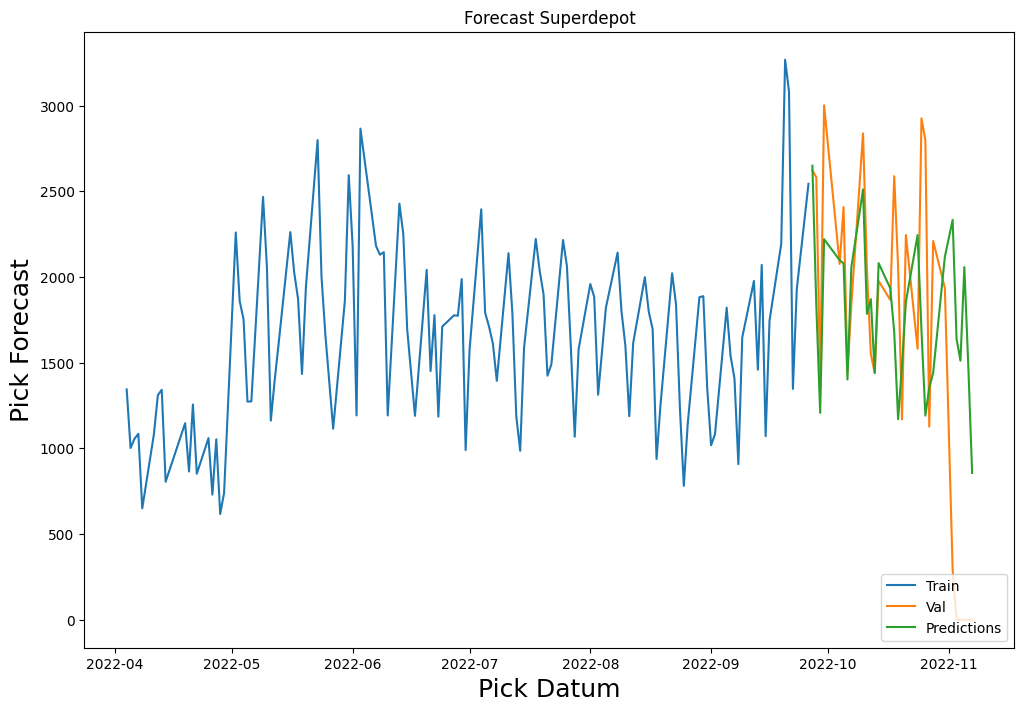

In [17]:
plt.figure(figsize=(12,8))
plt.title('Forecast Superdepot')
plt.xlabel('Pick Datum', fontsize=18)
plt.ylabel('Pick Forecast', fontsize=18)
plt.plot(train['Picks Gesamt'])
plt.plot(valid[['Picks Gesamt', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [18]:
valid.head()

,Picks Gesamt,Predictions
2022-09-27,2623.000000,2649.574707
2022-09-28,2582.000000,1837.368774
2022-09-29,1388.000000,1207.054321
2022-09-30,3002.000000,2220.722168
2022-10-04,2076.119048,2098.067627


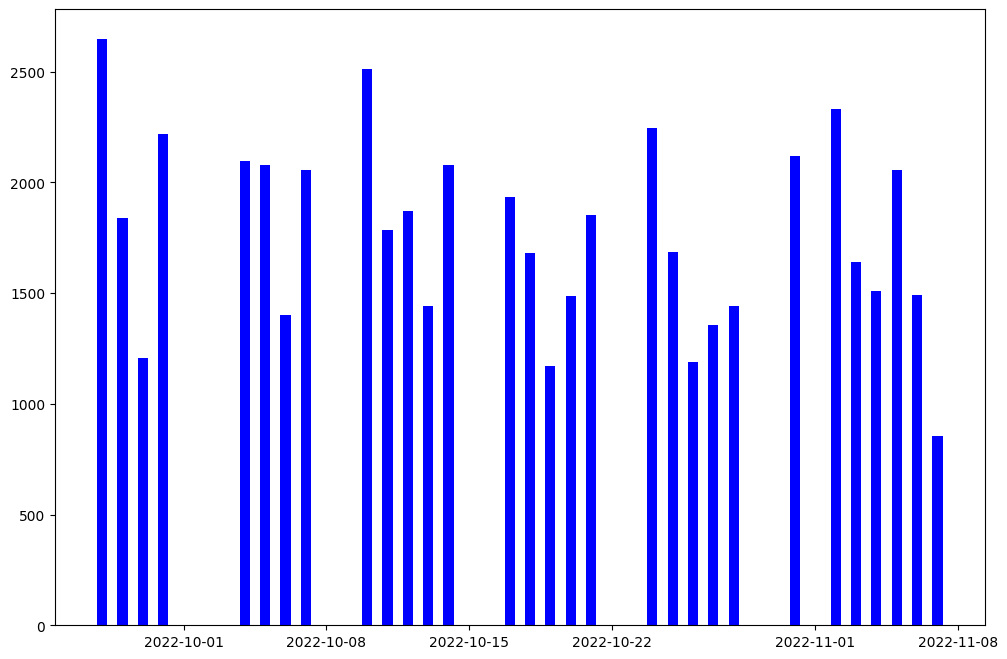

In [19]:
from matplotlib.pyplot import show
#last 20 days of validation set
plt.figure(figsize=(12,8))

valid
dia = plt.bar(valid.index, valid['Predictions'], width=0.5, color='b')
show(dia)

In [20]:
valid.to_csv('valid.csv', sep=';')